# Process Parameter Optimization

In [14]:
# ! pip install -r requirements.txt

## Libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [16]:
from utils.data_fetch import read_data
data = read_data()

C:\Users\Vardan\AppData\Local\Temp\ipykernel_8296\1164869249.py:2: DeprecationWarning: [Deprecated][in version 6.0.0]: client_factory will be replaced by gspread.http_client types
  data = read_data()


## Data Analysis

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Spindle Speed             108 non-null    float64
 1   Feed (mm/min)             108 non-null    float64
 2   Tool Dia. (mm)            108 non-null    float64
 3   Length of cut actual(mm)  108 non-null    float64
 4   Actual Width(mm)          108 non-null    float64
 5   Wi                        108 non-null    float64
 6   Wf                        108 non-null    float64
 7   delta Weight              108 non-null    float64
 8   MRR ideal                 108 non-null    float64
 9   MRR actual                108 non-null    float64
 10  Delta L                   108 non-null    float64
 11  Delta W                   108 non-null    float64
dtypes: float64(12)
memory usage: 10.3 KB


array([[<Axes: title={'center': 'Spindle Speed'}>,
        <Axes: title={'center': 'Feed (mm/min)'}>,
        <Axes: title={'center': 'Tool Dia. (mm)'}>],
       [<Axes: title={'center': 'Length of cut actual(mm)'}>,
        <Axes: title={'center': 'Actual Width(mm)'}>,
        <Axes: title={'center': 'Wi'}>],
       [<Axes: title={'center': 'Wf'}>,
        <Axes: title={'center': 'delta Weight'}>,
        <Axes: title={'center': 'MRR ideal'}>],
       [<Axes: title={'center': 'MRR actual'}>,
        <Axes: title={'center': 'Delta L'}>,
        <Axes: title={'center': 'Delta W'}>]], dtype=object)

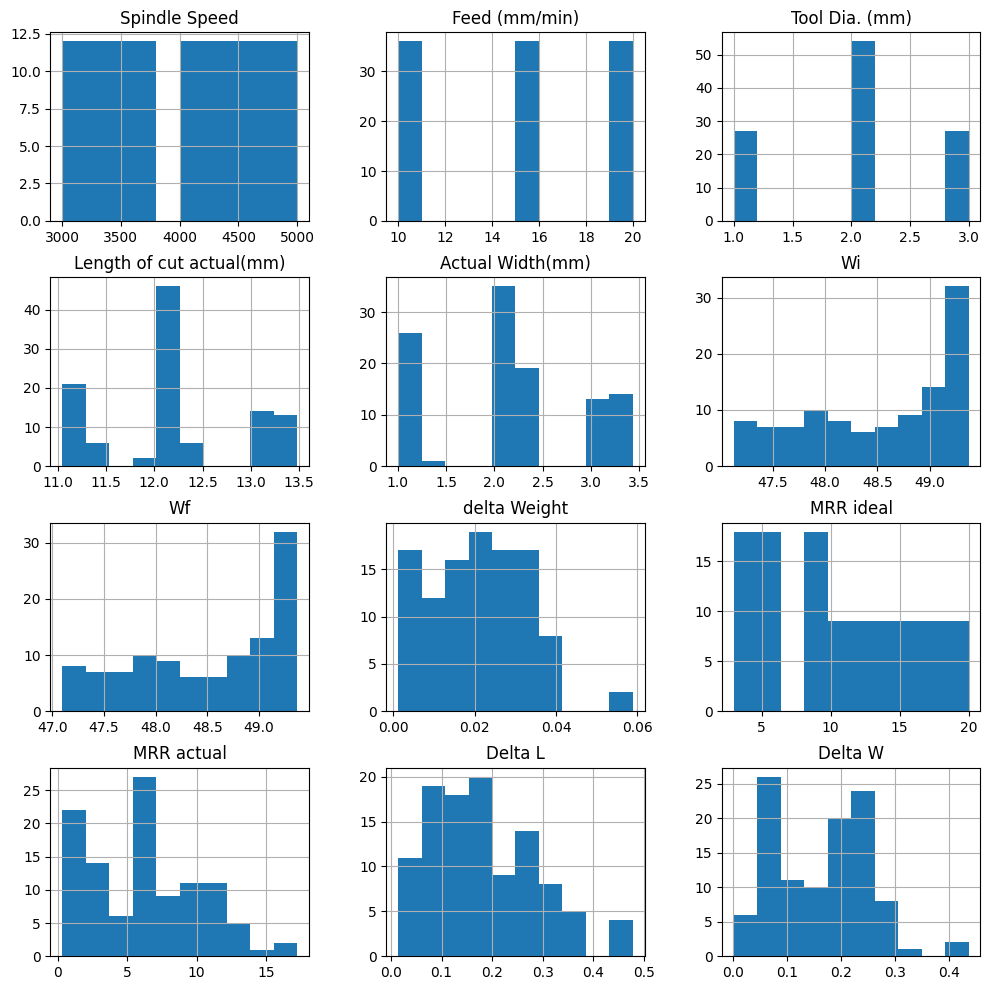

In [18]:
data.hist(figsize=(12,12))

In [19]:
corr_matrix = data.corr()

In [20]:
data.corr()["Spindle Speed"].sort_values()

Wi                         -2.316687e-01
Wf                         -2.288657e-01
delta Weight               -5.537949e-03
Tool Dia. (mm)             -2.481599e-16
MRR ideal                  -1.984575e-16
Feed (mm/min)              -1.086517e-16
Actual Width(mm)            1.878640e-02
Length of cut actual(mm)    3.165436e-02
MRR actual                  9.541056e-02
Delta W                     1.562890e-01
Delta L                     2.144670e-01
Spindle Speed               1.000000e+00
Name: Spindle Speed, dtype: float64

<Axes: >

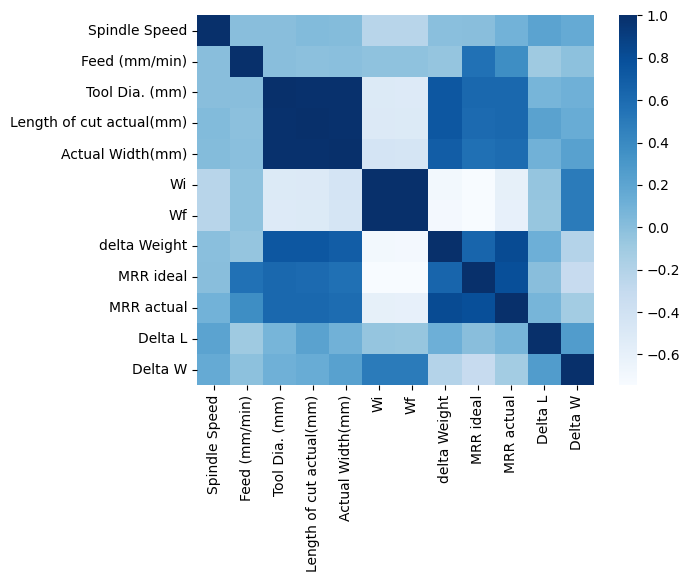

In [21]:
sns.heatmap(data.corr(), cmap='Blues')

In [22]:
data.corr()["Feed (mm/min)"].sort_values()

Delta L                    -9.533012e-02
delta Weight               -5.602127e-02
Wi                         -2.463229e-02
Wf                         -2.341556e-02
Delta W                    -1.963717e-02
Length of cut actual(mm)   -1.407029e-02
Actual Width(mm)           -2.360446e-03
Spindle Speed              -1.086517e-16
Tool Dia. (mm)             -3.840069e-17
MRR actual                  3.685047e-01
MRR ideal                   5.573312e-01
Feed (mm/min)               1.000000e+00
Name: Feed (mm/min), dtype: float64

array([[<Axes: xlabel='Delta W', ylabel='Feed (mm/min)'>,
        <Axes: xlabel='Delta L', ylabel='Feed (mm/min)'>,
        <Axes: xlabel='Feed (mm/min)', ylabel='Feed (mm/min)'>,
        <Axes: xlabel='Spindle Speed', ylabel='Feed (mm/min)'>],
       [<Axes: xlabel='Delta W', ylabel='Spindle Speed'>,
        <Axes: xlabel='Delta L', ylabel='Spindle Speed'>,
        <Axes: xlabel='Feed (mm/min)', ylabel='Spindle Speed'>,
        <Axes: xlabel='Spindle Speed', ylabel='Spindle Speed'>]],
      dtype=object)

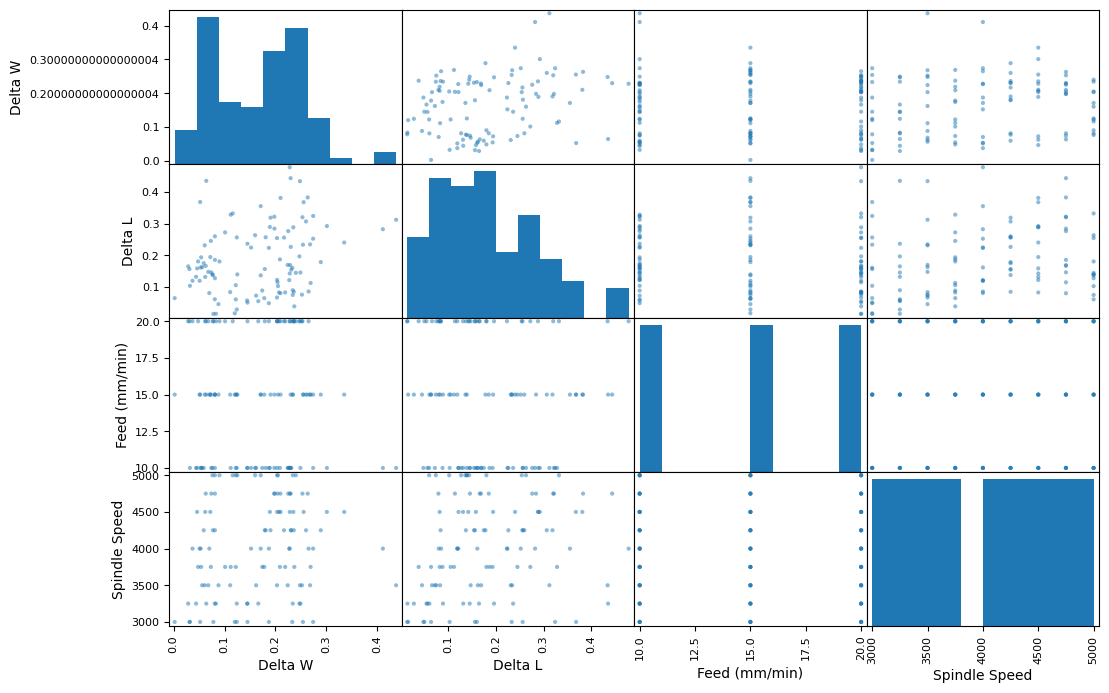

In [23]:
from pandas.plotting import scatter_matrix
attributes=["Delta W", "Delta L", "Feed (mm/min)", "Spindle Speed"]
scatter_matrix(data[attributes], figsize=(12, 8))[2:]

## Data Preprocessing

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
train_set, test_set = train_test_split(data, test_size=0.2, random_state=32)

In [25]:
X_train = train_set.drop(["Spindle Speed", "Feed (mm/min)"], axis = 1)
y_train=pd.concat([train_set["Spindle Speed"], train_set["Feed (mm/min)"]], axis=1)

In [26]:
features_name = X_train.columns
target_name = y_train.columns

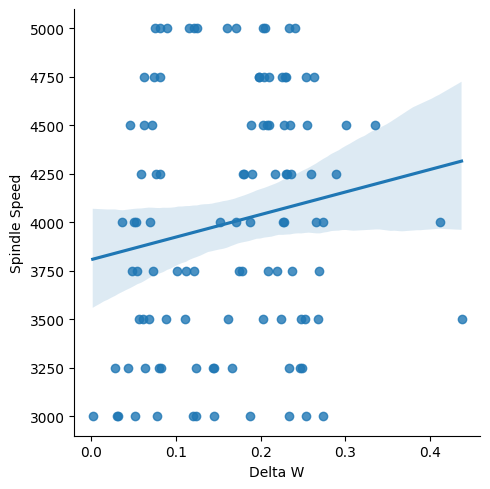

In [31]:
sns.lmplot(x ="Delta W", y ="Spindle Speed", data = data)

## Model Selection

In [27]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=20, n_jobs=-1, max_depth=10)
rf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("Random Forest", rnd_reg)
])

rf_model = rf_pipeline.fit(X_train, y_train)

In [16]:
X_new = X_train[:3]

In [18]:
y_train[:3]

,Spindle Speed,Feed (mm/min)
86,3250.0,20.0
63,3750.0,10.0
39,4000.0,10.0


In [17]:
rf_model.predict(X_new)

array([[3256.86379246,   15.87223377],
       [3737.0529859 ,   14.31637718],
       [4030.37761222,   13.35945433]])

In [19]:
estimator = rf_model.named_steps["Random Forest"].estimators_[0]

In [20]:
from utils.Visualizations import rf_visualize
rf_visualize(estimator, features_name,target_name)


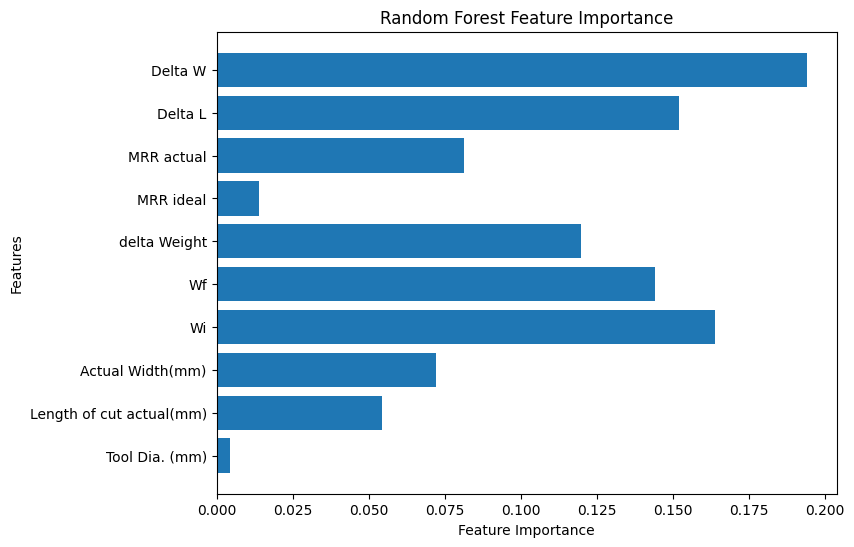

In [21]:
importances = rf_model.named_steps['Random Forest'].feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(features_name, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

## Performance Testing

In [22]:
from utils.performace_checking import Performance_testing
Performance_testing(rf_model, X_train,y_train, 10)

Scores: [266.9957335  272.65120252 375.17365385 231.73803444 344.72682352
 506.76537231 274.29419131 300.3090422  276.56858797 249.80475956]
Mean: 309.9027401189789
Standard deviation: 77.23293025439138


## Model Optimization

In [23]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    "rnd_reg1__bootstrap":[True],
    "rnd_reg1__n_estimators":[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600],
    "rnd_reg1__max_depth":[10, 20, 25, 30, 35, 40, 45, 50, 55, 60,65, 70, 75, 80],
    "rnd_reg1__max_features":["auto","sqrt"],
    "rnd_reg1__min_samples_leaf":[1, 2, 3, 4],
    "rnd_reg1__min_samples_split":[2, 5, 7, 10, 13, 15, 17,20],
}

rnd_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("rnd_reg1", RandomForestRegressor())
])
rnd_search = RandomizedSearchCV(rnd_pipeline, param_distributions=random_grid,cv=10,n_jobs=-1)


In [24]:
rnd_search.fit(X_train,y_train)

e:\Projects\Micromilling_process_optimisation\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
70 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Projects\Micromilling_process_optimisation\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Projects\Micromilling_process_optimisation\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Projects\Micromilling_proc

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rnd_reg1',
                                              RandomForestRegressor())]),
                   n_jobs=-1,
                   param_distributions={'rnd_reg1__bootstrap': [True],
                                        'rnd_reg1__max_depth': [10, 20, 25, 30,
                                                                35, 40, 45, 50,
                                                                55, 60, 65, 70,
                                                                75, 80],
                                        'rnd_reg1__max_features': ['auto',
                                                                   'sqrt'],
                                        'rnd_reg1__min_samples_leaf': [1, 2, 3,
                                                                       4],
                                        'rnd_reg1__min_samples_split': [2, 5, 7,
                                                                        10, 13,
                                                                        15, 17,
                                                                        20],
                                        'rnd_reg1__n_estimators': [50, 100, 150,
                                                                   200, 250,
                                                                   300, 350,
                                                                   400, 450,
                                                                   500, 550,
                                                                   600]})

In [25]:
rnd_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('rnd_reg1',
                 RandomForestRegressor(max_depth=45, max_features='sqrt',
                                       min_samples_split=5,
                                       n_estimators=550))])

In [26]:
rnd_search.best_params_

{'rnd_reg1__n_estimators': 550,
 'rnd_reg1__min_samples_split': 5,
 'rnd_reg1__min_samples_leaf': 1,
 'rnd_reg1__max_features': 'sqrt',
 'rnd_reg1__max_depth': 45,
 'rnd_reg1__bootstrap': True}

In [27]:
from utils.model_testing import test_score
test_score(rnd_search, X_train,y_train)

The mean square error is 136.00710723893903 and the r2 score is 0.6830888759664495.


In [29]:
final_model = rnd_search.best_estimator_

In [30]:
final_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rnd_reg1',
                 RandomForestRegressor(max_depth=45, max_features='sqrt',
                                       min_samples_split=5,
                                       n_estimators=550))])

In [41]:
estimator = final_model.named_steps["rnd_reg1"].estimators_[0]

In [42]:
rf_visualize(estimator,features_name,target_name)

In [31]:
Performance_testing(final_model,X_train,y_train,10)

Scores: [254.18525862 271.16754816 338.57635357 249.21524735 334.80429205
 433.95086252 304.67532197 296.40190891 241.43634587 293.30646953]
Mean: 301.7719608543224
Standard deviation: 54.43308796672375


In [32]:
import joblib
joblib.dump(final_model,"Random_Forest_Model.pkl")

['Random_Forest_Model.pkl']

In [33]:
model = joblib.load("Random_Forest_Model.pkl")

## Models Testing

In [34]:
X_test = test_set.drop(["Spindle Speed", "Feed (mm/min)"], axis = 1)
y_test=pd.concat([test_set["Spindle Speed"], test_set["Feed (mm/min)"]], axis=1)

In [35]:
from utils.model_testing import test_score
test_score(model, X_test, y_test)

The mean square error is 307.7877794562412 and the r2 score is 0.3598126471125169.


In [36]:
test_score(model, X_train,y_train)

The mean square error is 133.69042904491548 and the r2 score is 0.6770767137803795.
